# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [ ]:
pd.set_option('display.max_columns',None)

# Data Import

In [ ]:
data= pd.read_csv('ovarian_cancer_mean.csv')

In [ ]:
X = data.drop(columns=['TYPE'])
y = data['TYPE']

In [ ]:
y.value_counts()

TYPE
1.0    178
0.0    171
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    178
1    171
Name: count, dtype: int64

In [ ]:
X['Menopause'].value_counts()

Menopause
0.0    230
1.0    119
Name: count, dtype: int64

In [ ]:
data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%',
       'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL',
       'TP', 'UA', 'TYPE'],
      dtype='object')

# Correlation Analysis

In [ ]:
dt= data
dt

AFP     AG   Age   ALB   ALP   ALT   AST  BASO#  BASO%   BUN    Ca  \
0     3.58  19.36  47.0  45.4  56.0  11.0  24.0   0.01   0.30  5.35  2.48   
1    34.24  23.98  61.0  39.9  95.0   9.0  13.0   0.02   0.30  3.21  2.62   
2     1.50  18.40  39.0  45.4  77.0   9.0  18.0   0.03   0.60  3.80  2.57   
3     2.75  16.60  45.0  39.2  26.0  16.0  17.0   0.05   0.74  5.27  2.35   
4     2.36  19.97  45.0  35.0  47.0  21.0  27.0   0.01   0.10  4.89  2.48   
..     ...    ...   ...   ...   ...   ...   ...    ...    ...   ...   ...   
344   2.09  20.91  52.0  48.6  65.0  40.0  30.0   0.00   0.00  4.29  2.81   
345   2.00  12.14  37.0  46.1  49.0   9.0  20.0   0.00   0.00  3.12  2.29   
346   2.83  19.23  59.0  45.8  83.0   9.0  16.0   0.02   0.60  4.38  2.65   
347   1.84  27.22  30.0  47.8  64.0  26.0  22.0   0.03   0.30  3.61  2.82   
348   1.61  13.00  39.0  44.9  68.0   7.0  13.0   0.01   0.20  4.38  2.58   

       CA125  CA19-9      CA72-4   CEA     CL  CO2CP   CREA  DBIL   EO#   EO%  \
0      15.36   36.48    6.420000  1.40  107.4   19.9  103.0   2.0  0.04  1.00   
1    2444.00   19.98   10.173394  2.46  100.1   22.3   45.0   2.6  0.04  0.50   
2      56.08   12.18   10.173394  0.77  102.6   22.2   48.0   4.7  0.03  0.60   
3    2555.00   18.41  131.600000  0.82  103.2   24.0   65.7   2.9  0.00  0.07   
4    1391.00   11.15   10.173394  0.42   99.6   26.2   70.3   2.2  0.11  1.60   
..       ...     ...         ...   ...    ...    ...    ...   ...   ...   ...   
344    50.80   15.11   10.173394  1.74   98.1   25.9   54.0   3.8  0.01  0.30   
345    21.93    0.62   10.173394  1.67  103.6   25.0   67.0   5.9  0.02  0.30   
346    51.33    2.18   10.173394  2.31  102.3   27.1   50.0   4.0  0.05  1.50   
347    53.87   10.71   10.173394  0.93   93.1   23.1   59.0   3.5  0.23  2.20   
348    46.45   28.79   10.173394  0.76  101.7   29.5   69.0   2.7  0.04  0.80   

      GGT   GLO   GLU.    HCT         HE4    HGB  IBIL     K  LYM#  LYM%  \
0    16.0  28.5   4.67  0.273  183.948967   89.0   3.5  5.36  0.65  16.8   
1    13.0  32.1  10.50  0.417  934.100000  128.0   4.2  4.38  1.27  17.2   
2    10.0  32.5   4.64  0.391   47.560000  131.0  10.1  4.30  1.10  23.7   
3    17.0  26.9   4.76  0.372  853.500000  123.0   8.0  4.70  1.73  27.2   
4    24.0  31.5   4.07  0.383  404.900000  122.0   3.1  4.77  1.98  28.8   
..    ...   ...    ...    ...         ...    ...   ...   ...   ...   ...   
344  36.0  31.8   5.13  0.415   31.450000  142.0   6.9  4.11  1.18  30.7   
345   9.0  27.4   4.59  0.285   44.440000   80.0  11.3  3.64  1.39  23.3   
346  13.0  22.6   5.90  0.439   42.650000  144.0   9.8  4.63  1.10  32.7   
347  25.0  28.2   5.59  0.458   30.780000  154.0   7.8  4.22  2.15  20.6   
348   8.0  23.7   4.94  0.376   33.420000  128.0   5.6  4.30  1.52  32.0   

      MCH    MCV  Menopause    Mg  MONO#  MONO%    MPV     Na        NEU  \
0    33.7  103.4        0.0  0.78   0.22   5.70  11.70  141.3  76.200000   
1    26.2   85.3        1.0  0.82   0.41   5.50  10.00  142.0  76.500000   
2    28.4   84.6        0.0  1.00   0.25   5.40  11.40  138.9  69.700000   
3    30.6   92.6        1.0  1.11   0.42   6.55   7.38  139.1  65.500000   
4    27.7   87.0        0.0  1.08   0.69  10.00  10.40  141.0  59.500000   
..    ...    ...        ...   ...    ...    ...    ...    ...        ...   
344  31.1   91.0        0.0  0.94   0.28   7.30   9.90  140.8  66.575543   
345  18.9   67.2        0.0  0.77   0.32   5.40  11.90  137.1  66.575543   
346  29.4   89.8        1.0  0.92   0.13   3.90   9.70  144.0  66.575543   
347  28.8   85.6        0.0  1.02   0.43   4.10  10.50  139.2  66.575543   
348  31.0   91.0        0.0  0.93   0.30   6.30  10.30  139.9  66.575543   

      PCT   PDW  PHOS    PLT   RBC   RDW  TBIL    TP     UA  TYPE  
0    0.09  13.4  1.46   74.0  2.64  13.7   5.5  73.9  396.4   0.0  
1    0.30  11.2  1.09  304.0  4.89  12.7   6.8  72.0  119.2   0.0  
2    0.13  15.2  0.97  112.0  4.62  12.0  14.8  77.9  209.2   0.0  
3    0.25  

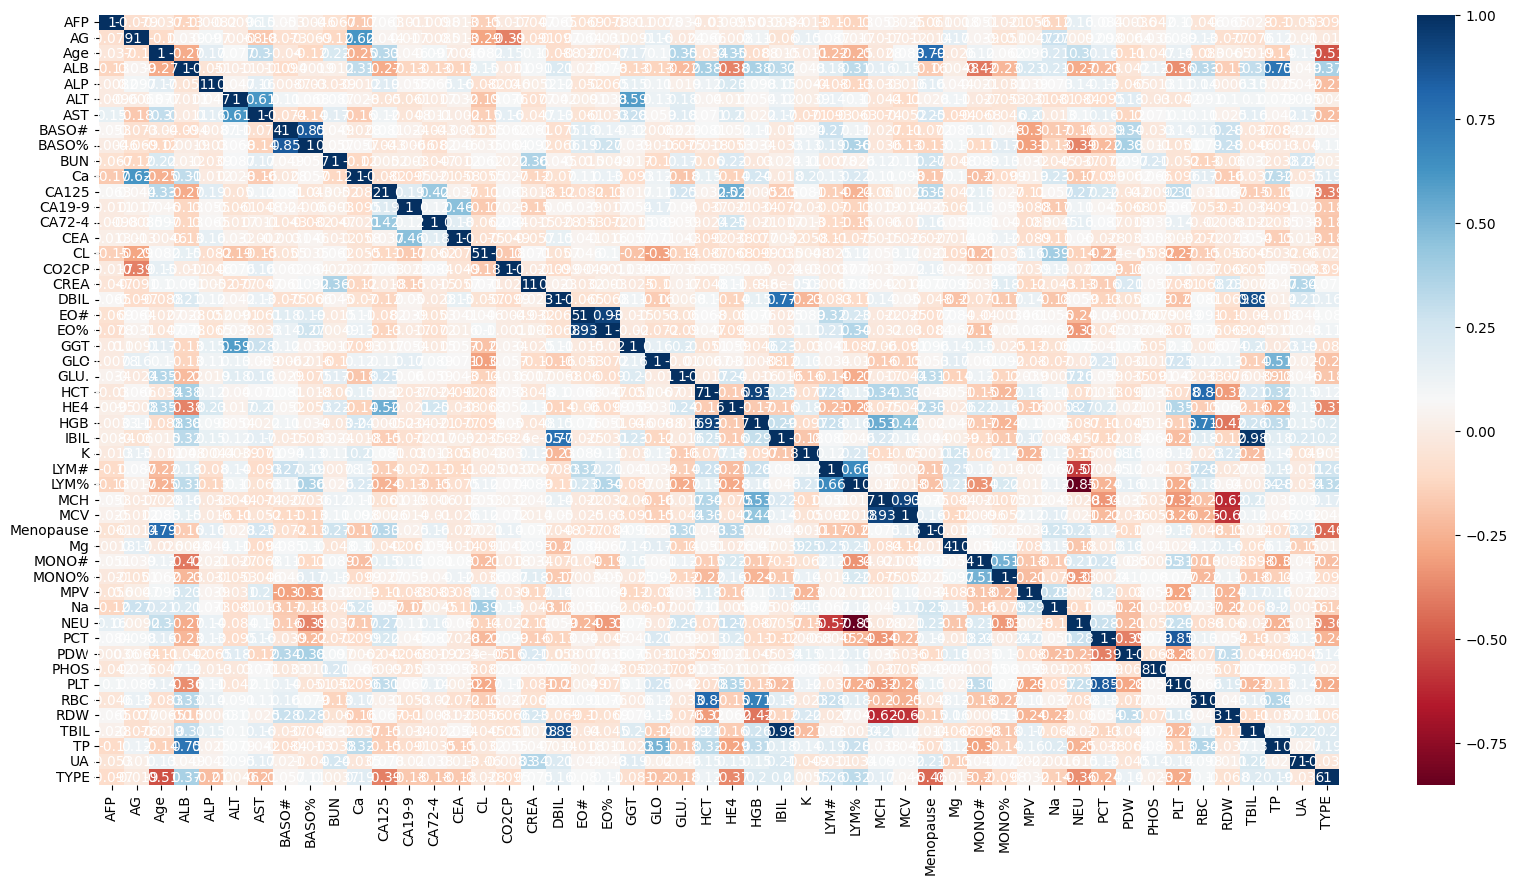

In [ ]:
corr = dt.corr()

plt.figure(figsize=(20,10)) # this sets the size of the figure to width=10 inches, height=8 inches
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

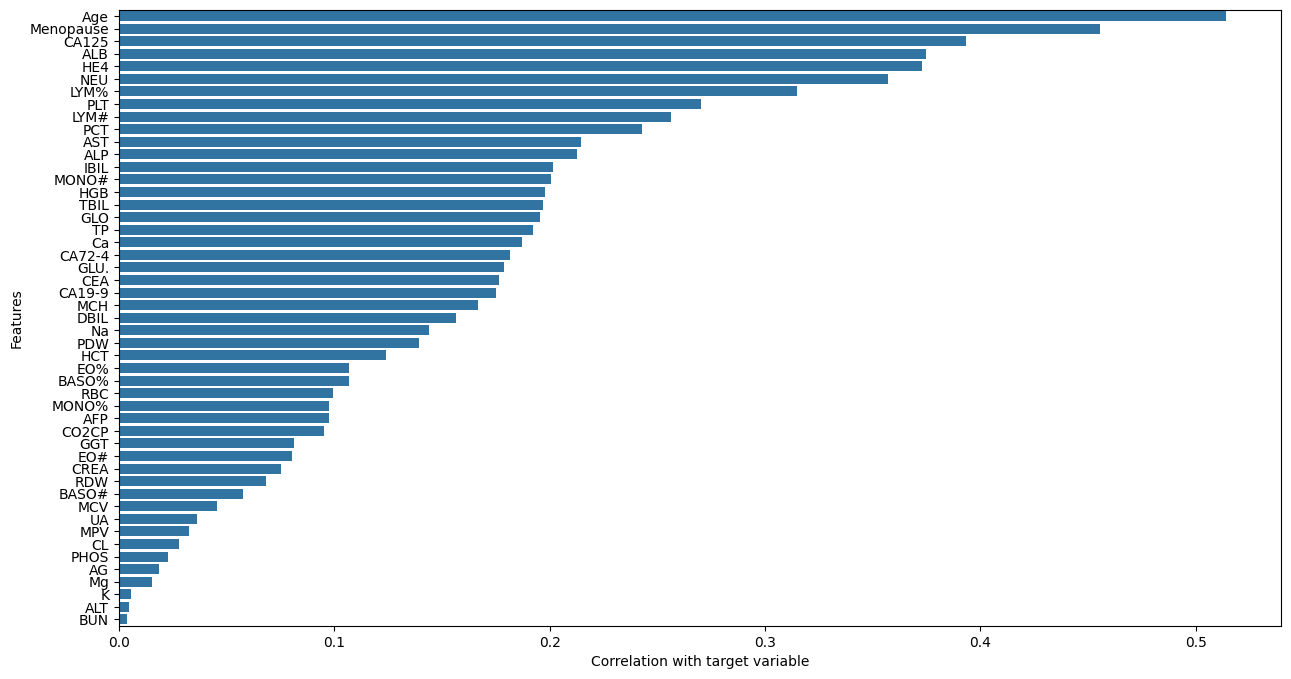

Column names of the 10 best features:
Index(['Age', 'Menopause', 'CA125', 'ALB', 'HE4', 'NEU', 'LYM%', 'PLT', 'LYM#',
       'PCT'],
      dtype='object')


In [ ]:
#calculate correlation
corr = abs(X.corrwith(y))

# sort correlation values in descending order
corr = corr.sort_values(ascending=False)

# number of top k correlation features
k = 10

# get the top k correlation features
top_k_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
sns.barplot(x=corr.values, y=corr.index)
plt.xlabel('Correlation with target variable')
plt.ylabel('Features')
plt.show()

print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_k_features)

***Top 10 Features***

In [ ]:
# number of top k correlation features
k = 10

# get the top k correlation features
top_10_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
#sns.barplot(x=top_k_features.values, y=top_k_features.index)
#plt.xlabel('Correlation with target variable')
#plt.ylabel('Features')
#plt.show()

#print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_10_features)

Index(['Age', 'Menopause', 'CA125', 'ALB', 'HE4', 'NEU', 'LYM%', 'PLT', 'LYM#',
       'PCT'],
      dtype='object')


<Figure size 1500x800 with 0 Axes>

***Top 7 Features***

In [ ]:
# number of top k correlation features
k = 7

# get the top k correlation features
top_7_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
#sns.barplot(x=top_k_features.values, y=top_k_features.index)
#plt.xlabel('Correlation with target variable')
#plt.ylabel('Features')
#plt.show()

#print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_7_features)

Index(['Age', 'Menopause', 'CA125', 'ALB', 'HE4', 'NEU', 'LYM%'], dtype='object')


<Figure size 1500x800 with 0 Axes>

# Classification models and metrics define

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [ ]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

# Performance of classifiers on top 10 features using Corr

In [ ]:
#selected_features = corr[corr> 0.25].index

In [ ]:
#selected_features

 Standardization

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[top_10_features]

In [ ]:
x.columns

Index(['Age', 'Menopause', 'CA125', 'ALB', 'HE4', 'NEU', 'LYM%', 'PLT', 'LYM#',
       'PCT'],
      dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    178
1    171
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            37.598724
score_time           5.250053
test_accuracy       87.705882
test_recall         84.215686
test_specificity    91.013072
test_gmean          87.349646
test_roc            87.614379
test_precision      90.457516
test_mcc            75.955715
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.180013
score_time           3.553774
test_accuracy       77.092437
test_recall         65.522876
test_specificity    88.137255
test_gmean          75.483952
test_roc            76.830065
test_precision      85.684829
test_mcc            56.207326
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.824618
score_time           1.570895
test_accuracy       83.394958
test_recall         78.986928
test_specificity    87.581699
test_gmean          82.797012
test_roc            83.284314
test_precision      86.609127
test_mcc            67.675755
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.326725
score_time           2.669494
test_accuracy       84.848739
test_recall         79.542484
test_specificity    89.934641
test_gmean          84.364349
test_roc            84.738562
test_precision      88.754097
test_mcc            70.414008
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.744494
score_time           2.894168
test_accuracy       86.277311
test_recall         84.183007
test_specificity    88.235294
test_gmean          85.722900
test_roc            86.209150
test_precision      88.886505
test_mcc            73.574233
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            99.509482
score_time           3.243198
test_accuracy       86.848739
test_recall         85.980392
test_specificity    87.614379
test_gmean          86.433542
test_roc            86.797386
test_precision      88.052897
test_mcc            74.427438
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            21.618969
score_time           1.614943
test_accuracy       83.991597
test_recall         80.130719
test_specificity    87.614379
test_gmean          83.390726
test_roc            83.872549
test_precision      87.054008
test_mcc            68.785682
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             6.853542
score_time           1.744545
test_accuracy       86.563025
test_recall         84.803922
test_specificity    88.137255
test_gmean          86.091606
test_roc            86.470588
test_precision      88.393455
test_mcc            73.844175
dtype: float64

# Performance of classifiers on top 7 features using Corr

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[top_7_features]

In [ ]:
x.columns

Index(['Age', 'Menopause', 'CA125', 'ALB', 'HE4', 'NEU', 'LYM%'], dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    178
1    171
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            30.256963
score_time           4.403636
test_accuracy       87.134454
test_recall         83.006536
test_specificity    91.013072
test_gmean          86.633695
test_roc            87.009804
test_precision      90.353164
test_mcc            74.956109
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.177040
score_time           3.546696
test_accuracy       80.252101
test_recall         69.575163
test_specificity    90.392157
test_gmean          78.828907
test_roc            79.983660
test_precision      87.986838
test_mcc            62.043913
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.687480
score_time           1.599362
test_accuracy       84.252101
test_recall         82.450980
test_specificity    85.915033
test_gmean          83.881033
test_roc            84.183007
test_precision      85.610321
test_mcc            69.155692
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.703063
score_time           1.580381
test_accuracy       83.689076
test_recall         77.777778
test_specificity    89.313725
test_gmean          83.058589
test_roc            83.545752
test_precision      87.871021
test_mcc            68.239233
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.682655
score_time           2.748072
test_accuracy       83.991597
test_recall         81.862745
test_specificity    86.045752
test_gmean          83.393069
test_roc            83.954248
test_precision      86.259226
test_mcc            69.069997
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            50.579679
score_time           4.064560
test_accuracy       87.420168
test_recall         86.535948
test_specificity    88.169935
test_gmean          87.105043
test_roc            87.352941
test_precision      88.274404
test_mcc            75.340055
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            18.533010
score_time           1.626949
test_accuracy       85.134454
test_recall         81.862745
test_specificity    88.202614
test_gmean          84.458577
test_roc            85.032680
test_precision      88.214826
test_mcc            71.331199
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             8.782547
score_time           2.432222
test_accuracy       86.848739
test_recall         85.392157
test_specificity    88.137255
test_gmean          86.363290
test_roc            86.764706
test_precision      88.498718
test_mcc            74.482271
dtype: float64

# Chi Square

Chi Square

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [ ]:
X = dt.drop(columns=['TYPE'])
y = dt['TYPE']

In [ ]:
chi2_selector = SelectKBest(chi2, k='all')  # k='all' to get scores for all features
chi2_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7cc09dc73010>)

In [ ]:
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

In [ ]:
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': chi2_pvalues
})

In [ ]:
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

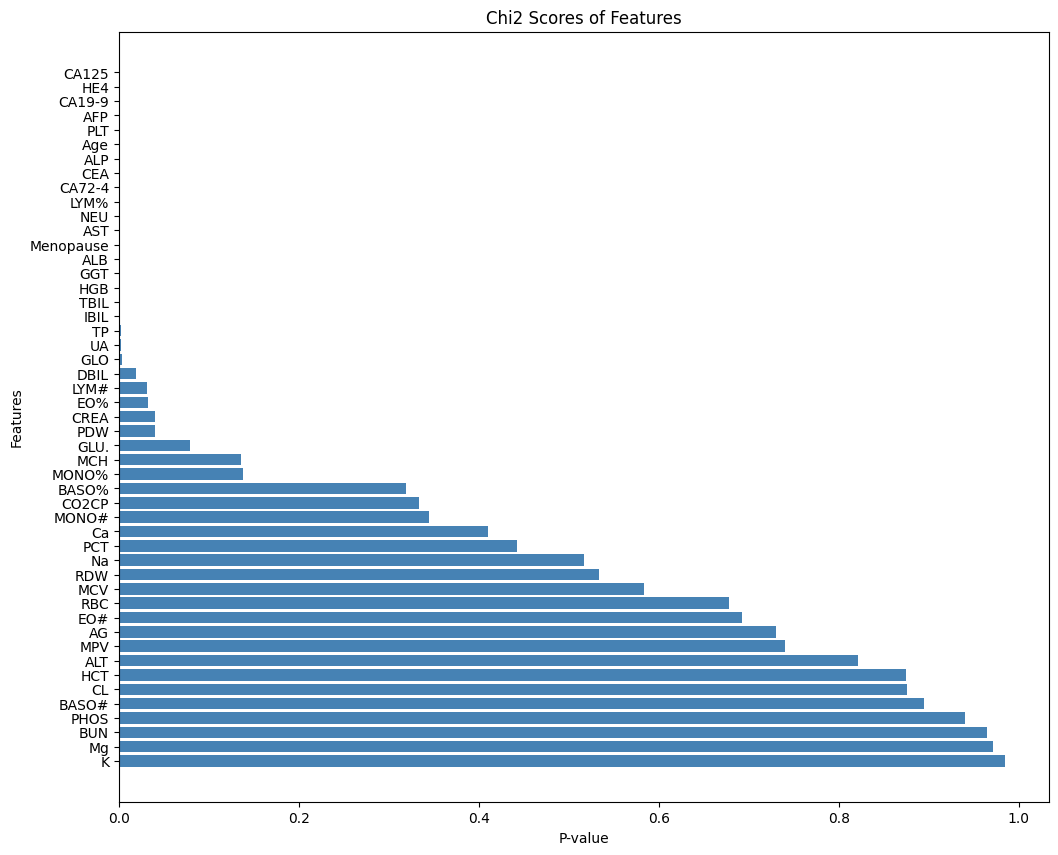

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(chi2_results['Feature'], chi2_results['P-value'], color='steelblue')
plt.xlabel('P-value')
plt.ylabel('Features')
plt.title('Chi2 Scores of Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(chi2_results)

      Feature    Chi2 Score        P-value
11      CA125  92648.793729   0.000000e+00
25        HE4  35874.009444   0.000000e+00
12     CA19-9   3371.220831   0.000000e+00
0         AFP   2523.715979   0.000000e+00
43        PLT    902.138326  3.364921e-198
2         Age    467.405291  1.175979e-103
4         ALP    390.223089   7.401344e-87
14        CEA    373.269970   3.632692e-83
13     CA72-4    222.706847   2.322562e-50
30       LYM%    142.901838   6.175805e-33
39        NEU     66.477389   3.539303e-16
6         AST     58.892531   1.665232e-14
33  Menopause     47.776973   4.775684e-12
3         ALB     37.362392   9.809562e-10
21        GGT     34.649088   3.948236e-09
26        HGB     26.230666   3.029729e-07
46       TBIL     24.998676   5.736969e-07
27       IBIL     20.089305   7.390883e-06
47         TP      9.553076   1.996147e-03
48         UA      8.926148   2.811166e-03
22        GLO      8.847074   2.935591e-03
18       DBIL      5.454404   1.951906e-02
29       LY

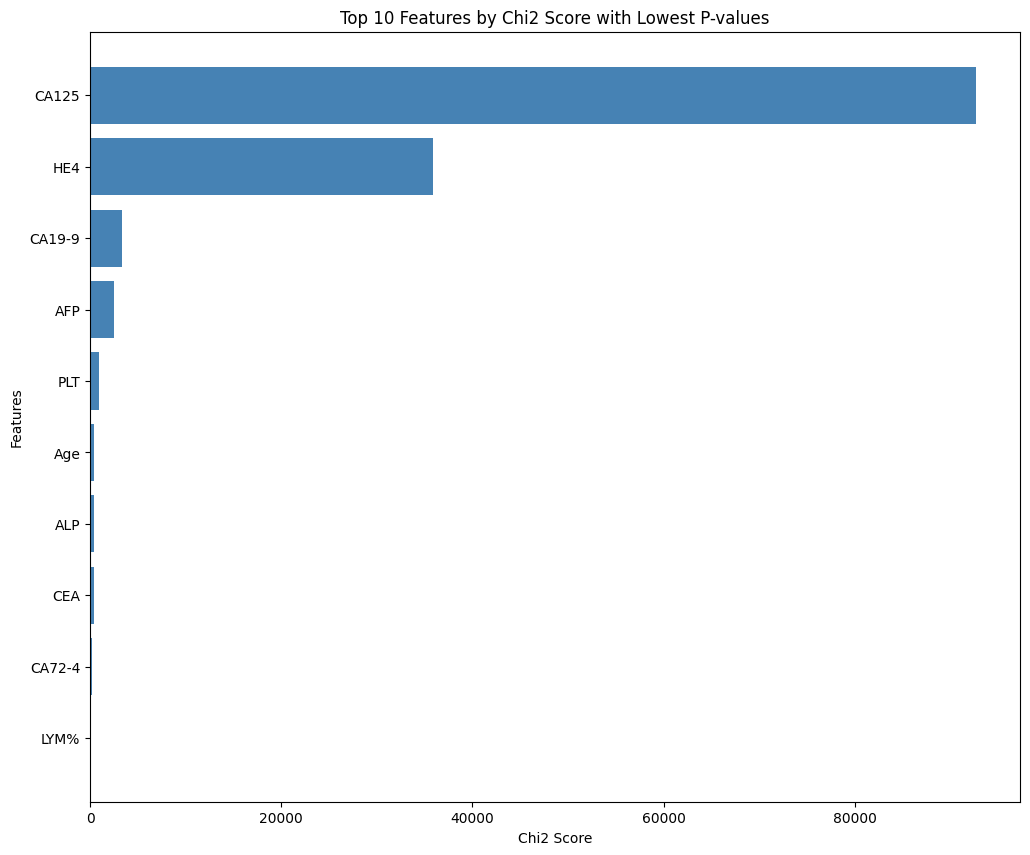

In [ ]:
top_features = chi2_results.sort_values(by='P-value').head(10)

# Plot the top 10 features
plt.figure(figsize=(12, 10))
plt.barh(top_features['Feature'], top_features['Chi2 Score'], color='steelblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.title('Top 10 Features by Chi2 Score with Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
selected_features_chi = top_features.Feature.tolist()

In [ ]:
selected_features_chi

['CA125', 'HE4', 'CA19-9', 'AFP', 'PLT', 'Age', 'ALP', 'CEA', 'CA72-4', 'LYM%']

# Performance of classifiers on selected features using Chi Square

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[selected_features_chi]

In [ ]:
x.columns

Index(['CA125', 'HE4', 'CA19-9', 'AFP', 'PLT', 'Age', 'ALP', 'CEA', 'CA72-4',
       'LYM%'],
      dtype='object')

In [ ]:
y.value_counts()

TYPE
1.0    178
0.0    171
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    178
1    171
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            31.798055
score_time           4.361222
test_accuracy       88.563025
test_recall         83.071895
test_specificity    93.823529
test_gmean          88.078046
test_roc            88.447712
test_precision      92.797296
test_mcc            77.839175
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.210221
score_time           3.447626
test_accuracy       82.554622
test_recall         68.398693
test_specificity    96.045752
test_gmean          80.484864
test_roc            82.222222
test_precision      95.068400
test_mcc            68.220509
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.756090
score_time           1.769819
test_accuracy       85.411765
test_recall         79.607843
test_specificity    91.013072
test_gmean          84.939204
test_roc            85.310458
test_precision      89.412112
test_mcc            71.483292
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.428394
score_time           2.320521
test_accuracy       86.840336
test_recall         82.516340
test_specificity    91.045752
test_gmean          86.476700
test_roc            86.781046
test_precision      90.264128
test_mcc            74.413773
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.821544
score_time           2.778959
test_accuracy       84.252101
test_recall         84.248366
test_specificity    84.215686
test_gmean          83.921410
test_roc            84.232026
test_precision      83.810888
test_mcc            69.128458
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            74.229071
score_time           4.722412
test_accuracy       87.134454
test_recall         83.071895
test_specificity    90.980392
test_gmean          86.704982
test_roc            87.026144
test_precision      89.919691
test_mcc            74.776859
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            22.397060
score_time           1.677213
test_accuracy       85.697479
test_recall         82.483660
test_specificity    88.758170
test_gmean          85.372383
test_roc            85.620915
test_precision      87.524983
test_mcc            71.777572
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.133520
score_time           1.855783
test_accuracy       87.394958
test_recall         83.660131
test_specificity    90.915033
test_gmean          86.981315
test_roc            87.287582
test_precision      90.210111
test_mcc            75.406131
dtype: float64